# Consola

## Topics

Para lanzar todo lo relacionado con topics se usa el comando
```console
kafka-topics.sh
```
Al lanzar este comando en la terminal mostrará una guia de todos los argumentos que tiene

### Crear Topics

Para lanzar topics hay que que tener en cuenta los siguientes argumentos:
- **bootstrap-server**: servidor de kafka que va a conectarse indicando una ip y puerto (localhost:9092 por defecto)
- **topic**: indica nombre del topic, en este caso se crea con el nombre indicado
- **create**: indica que crea el topic
- **partitions**: como se dijo en la teoria es necesario crear particiones a la hora de crear el topic. Con este argumento indicamos cuantas particiones se quiere
- **replication-factor**: igual que las particiones hay que especificar cuantas se quiere a la hora de crear el topic. Con este argumento indicamos el nivel de replicación que hay. **NOTA**: no se puede poner un número mayor de topics, ejemplo: si este es el primer topic que se crea no se puede poner 2 porque solamente existe un topic
```console
kafka-topics.sh --bootstrap-server localhost:9092 --topic first_topic --create --partitions 3 --replication-factor 1
```

### Listar Topics
Para verificar si existe un topic ya creado, o listar los que que tiene el cluster:
- **bootstrap-server**: se indica que servidor de kafka se quiere usar indicando su ip y puerto
- **list**: indica que lista los topics

```console
kafka-topics.sh --bootstrap-server localhost:9092 --list
```

### Describir Topics
Para obtener información detallada de un topic:
- **bootstrap-server**: se indica que servidor de kafka se quiere usar indicando su ip y puerto
- **topic**: indica nombre del topic, en este caso se describe con el nombre indicado
- **describe**: se obtiene toda la información del topic

```console
kafka-topics.sh --bootstrap-server localhost:9092 --topic first_topic --describe
```
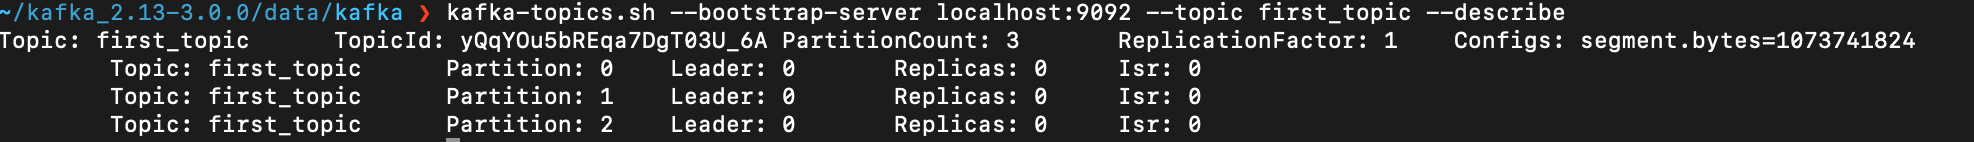

### Eliminar Topics

Para obtener información detallada de un topic:
- **bootstrap-server**: se indica que servidor de kafka se quiere usar indicando su ip y puerto
- **topic**: indica nombre del topic, en este caso se borra el topic nombre indicado
- **dekete**: elimina el topic
```console
kafka-topics.sh --bootstrap-server localhost:9092 --topic second_topic --delete
```


## Producer

Para lanzar todo lo relacionado con Producer se usa el comando
```console
kafka-console-producer.sh
```
Al lanzar este comando en la terminal mostrará una guia de todos los argumentos que tiene.

### Crear producer

Para crear un producer para enviar mensaje a un topic hay que que poner obligatoriamente los siguientes argumentos: 

- **bootstrap-server**: se indica que servidor de kafka se quiere usar indicando su ip y puerto
- **topic**: indica nombre del topic que el producer va a enviar los mensajes
```console
kafka-console-producer.sh  --bootstrap-server localhost:9092 --topic first_topic 
```
Si todo va bien podremos enviar todos tipos de mensajes
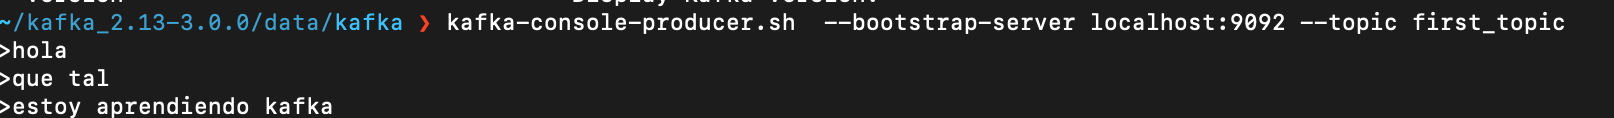

#### Otras propiedades

Se puede poner otras propiedades a la hora de lanzar el Producer con el argumento 'producer-property' como por ejemplos los ACKs. Se puede configurar los ACKs explicado en la teoria
```console
kafka-console-producer.sh  --bootstrap-server localhost:9092 --topic first_topic --producer-property acks=all
```
### Crear topics
Se puede crear un topic que no existe si se especifica el nombre, sin embargo, la primera vez que se intenta mandar un mensaje este da una adventencia (LEADER_NOT_AVAILABLE) ya que la primera vez no existe y no puede encontrar al lider, sin embargo, kafka lo crea automáticamente con valores por defecto (sistema de prevención de errores): '
```console
kafka-console-producer.sh  --bootstrap-server localhost:9092 --topic new_topic
```

Ahora si se hace una lista de topics se encontrará el topic creado, y si se hace un describe tendrás las opciones por defecto configuradas en el fichero config/server.properties

## Consumer

Para lanzar todo lo relacionado con Producer se usa el comando
```console
kafka-console-consumer.sh 
```
Al lanzar este comando en la terminal mostrará una guia de todos los argumentos que tiene.
### Crear consumer
Para crear un consumer para recibir mensajes desde un topic hay que que poner obligatoriamente los siguientes argumentos: 

- **bootstrap-server**: se indica que servidor de kafka se quiere usar indicando su ip y puerto
- **topic**: indica nombre del topic que el producer va a enviar los mensajes
```console
kafka-console-consumer.sh   --bootstrap-server localhost:9092 --topic first_topic 
```

Al ejecutar este comando no pasará nada, ya que solo recibe los mensajes cuando el productor esta activo y le envia mensaje. Sin embargo, si se quiere consumir todos los mensajes del topic desde el principio se utiliza:
- **from-beginning**: recibe todos los mensajes desde que se creo el topic

```console
kafka-console-consumer.sh   --bootstrap-server localhost:9092 --topic first_topic --from-beginning 
```

### Consumers groups
Como se dijo en la teoria un consumidor forma parte de un grupo. Los grupos se distinguen por su ID(nombre). Para crear un grupo se hace con el argumento:
- **group**: indica el nombre del grupo

```console
kafka-console-consumer.sh   --bootstrap-server localhost:9092 --topic first_topic --group my-first-app 
```
Ahora al crear varios consumidores con el mismo grupo, la carga de mensajes del Producer se distribuirá entre los dos, de la misma manera si un consumidor cae, el que se mantiene ejecutandose pasará a leer todos los mensajes.

Por otra parte, al ejecutar la propiedad **from-beginning** en un grupo, la primera vez leerá todos los mensajes, pero si volvemos a ejecutar ya no leerá todos los mensajes porque ya los ha leido ya que esta es una propiedad de los grupos, mantenerse en escucha desde el último mensaje que ha leido.

Sí se cierra el consumidor y el productor sigue enviando mensajes al levantar otra vez el consumer recibirá los mensajes recibidos, ya que en un grupo sabe hasta que mensaje ha leido.

```console
kafka-console-producer.sh --bootstrap-server localhost:9092 --topic first_topic
    < eje1
    < eje2
    < eje3
    < eje4
kafka-console-consumer.sh   --bootstrap-server localhost:9092 --topic first_topic --group my-second-app 
```
Hasta este punto no recibira, sin embargo si se se cierra el Consumer y el Producer sigue enviando mensajes, cuando el Consumer con el mismo grupo vuelva a estar operativo recibirá todos los mensajes de golpe.

```console
kafka-console-producer.sh --bootstrap-server localhost:9092 --topic first_topic
    < eje7
    < eje8
    < eje9
    < eje10
kafka-console-consumer.sh   --bootstrap-server localhost:9092 --topic first_topic --group my-second-app 
```